# GAN Training

## imports

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

from models.GAN_IMP import GAN
from utils.loaders import load_safari

Using TensorFlow backend.


In [13]:
RUN_ID = '0009'
RUN_FOLDER = os.path.join("./run", RUN_ID)

## data

In [3]:
(x_train, y_train) = load_safari('elephant')

## architecture

In [14]:
x_train.shape

(80000, 28, 28, 1)

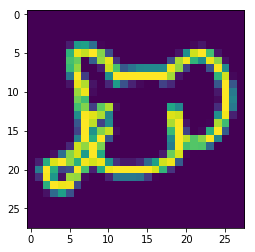

In [15]:
plt.imshow(x_train[0,:,:,0])

In [16]:
INPUT_DIM = (28,28,1)

CONV_FILTERS = [64,64,128, 256]
CONV_KERNEL_SIZES = [4,4,4,4]
CONV_STRIDES = [2,2,2,1]
CONV_PADDINGS = ['same', 'same', 'same', 'same']

CONV_T_FILTERS = [128,64,1]
CONV_T_KERNEL_SIZES = [4,4,4]
CONV_T_STRIDES = [1,2,2]
CONV_T_PADDINGS = ['same','same','same']

Z_DIM = 100


In [17]:
gan = GAN(INPUT_DIM
                , CONV_FILTERS
                , CONV_KERNEL_SIZES
                , CONV_STRIDES
                , CONV_PADDINGS
                , CONV_T_FILTERS
                , CONV_T_KERNEL_SIZES
                , CONV_T_STRIDES
                , CONV_T_PADDINGS
                , Z_DIM
                 )

gan.save(RUN_FOLDER)

In [18]:
#gan.load_weights(os.path.join(RUN_FOLDER, 'weights/weights.h5'))

In [19]:
gan.discriminator.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
discriminator_input (InputLa (None, 28, 28, 1)         0         
_________________________________________________________________
discriminator_conv_0 (Conv2D (None, 14, 14, 64)        1024      
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 14, 14, 64)        0         
_________________________________________________________________
batch_normalization_7 (Batch (None, 14, 14, 64)        256       
_________________________________________________________________
discriminator_conv_1 (Conv2D (None, 7, 7, 64)          65536     
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 7, 7, 64)          0         
_________________________________________________________________
zero_padding2d_2 (ZeroPaddin (None, 8, 8, 64)          0         
__________

In [20]:
gan.generator.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
generator_input (InputLayer) (None, 100)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 6272)              633472    
_________________________________________________________________
activation_5 (Activation)    (None, 6272)              0         
_________________________________________________________________
reshape_2 (Reshape)          (None, 7, 7, 128)         0         
_________________________________________________________________
generator_conv_t_0 (Conv2DTr (None, 7, 7, 128)         262144    
_________________________________________________________________
activation_6 (Activation)    (None, 7, 7, 128)         0         
_________________________________________________________________
batch_normalization_11 (Batc (None, 7, 7, 128)         512       
__________

## training

In [21]:
BATCH_SIZE = 32
EPOCHS = 40000
PRINT_EVERY_N_BATCHES = 10
INITIAL_EPOCH = 0

In [22]:
gan.train(     
    x_train
    , batch_size = BATCH_SIZE
    , epochs = 40000
    , run_folder = RUN_FOLDER
    , print_every_n_batches = PRINT_EVERY_N_BATCHES
    , initial_epoch = INITIAL_EPOCH
    ,discriminator_training_loops = 5
)

/Users/davidfoster/.virtualenvs/gdl/lib/python3.6/site-packages/keras/engine/training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


0 [D loss: -0.000184] [G loss: 0.000332]
1 [D loss: -0.000186] [G loss: 0.000329]
2 [D loss: -0.000188] [G loss: 0.000327]
3 [D loss: -0.000190] [G loss: 0.000326]
4 [D loss: -0.000190] [G loss: 0.000325]
5 [D loss: -0.000190] [G loss: 0.000325]
6 [D loss: -0.000191] [G loss: 0.000326]
7 [D loss: -0.000190] [G loss: 0.000327]
8 [D loss: -0.000190] [G loss: 0.000329]
9 [D loss: -0.000190] [G loss: 0.000332]
10 [D loss: -0.000191] [G loss: 0.000335]
11 [D loss: -0.000191] [G loss: 0.000340]
12 [D loss: -0.000189] [G loss: 0.000348]
13 [D loss: -0.000187] [G loss: 0.000357]
14 [D loss: -0.000185] [G loss: 0.000371]
15 [D loss: -0.000183] [G loss: 0.000386]
16 [D loss: -0.000182] [G loss: 0.000400]
17 [D loss: -0.000181] [G loss: 0.000413]
18 [D loss: -0.000184] [G loss: 0.000423]
19 [D loss: -0.000185] [G loss: 0.000435]
20 [D loss: -0.000184] [G loss: 0.000436]
21 [D loss: -0.000188] [G loss: 0.000444]
22 [D loss: -0.000192] [G loss: 0.000451]
23 [D loss: -0.000197] [G loss: 0.000457]
24

194 [D loss: 0.003675] [G loss: -0.002002]
195 [D loss: 0.004452] [G loss: -0.002155]
196 [D loss: 0.004644] [G loss: -0.002215]
197 [D loss: 0.005017] [G loss: -0.002545]
198 [D loss: 0.005361] [G loss: -0.002324]
199 [D loss: 0.004402] [G loss: -0.002347]
200 [D loss: 0.004703] [G loss: -0.002367]
201 [D loss: 0.004654] [G loss: -0.002338]
202 [D loss: 0.004671] [G loss: -0.002551]
203 [D loss: 0.004735] [G loss: -0.002060]
204 [D loss: 0.004430] [G loss: -0.001886]
205 [D loss: 0.004708] [G loss: -0.001883]
206 [D loss: 0.004492] [G loss: -0.001933]
207 [D loss: 0.004132] [G loss: -0.001543]
208 [D loss: 0.003969] [G loss: -0.001682]
209 [D loss: 0.004108] [G loss: -0.001436]
210 [D loss: 0.004526] [G loss: -0.001040]
211 [D loss: 0.003858] [G loss: -0.000940]
212 [D loss: 0.004977] [G loss: -0.000967]
213 [D loss: 0.004238] [G loss: -0.001052]
214 [D loss: 0.004706] [G loss: -0.001117]
215 [D loss: 0.004189] [G loss: -0.001171]
216 [D loss: 0.003979] [G loss: -0.001249]
217 [D loss

385 [D loss: 0.009771] [G loss: -0.008706]
386 [D loss: 0.009865] [G loss: -0.008985]
387 [D loss: 0.009750] [G loss: -0.009012]
388 [D loss: 0.010684] [G loss: -0.009010]
389 [D loss: 0.010025] [G loss: -0.008770]
390 [D loss: 0.009759] [G loss: -0.008985]
391 [D loss: 0.010537] [G loss: -0.008941]
392 [D loss: 0.010809] [G loss: -0.009025]
393 [D loss: 0.010900] [G loss: -0.009507]
394 [D loss: 0.011273] [G loss: -0.009255]
395 [D loss: 0.009993] [G loss: -0.009485]
396 [D loss: 0.011291] [G loss: -0.009276]
397 [D loss: 0.011167] [G loss: -0.009585]
398 [D loss: 0.010946] [G loss: -0.009874]
399 [D loss: 0.010668] [G loss: -0.009910]
400 [D loss: 0.011672] [G loss: -0.010077]
401 [D loss: 0.011608] [G loss: -0.010114]
402 [D loss: 0.011490] [G loss: -0.010077]
403 [D loss: 0.012428] [G loss: -0.010079]
404 [D loss: 0.011616] [G loss: -0.010439]
405 [D loss: 0.011846] [G loss: -0.010400]
406 [D loss: 0.012402] [G loss: -0.010506]
407 [D loss: 0.011628] [G loss: -0.010294]
408 [D loss

579 [D loss: 0.003040] [G loss: 0.001816]
580 [D loss: 0.002796] [G loss: 0.002992]
581 [D loss: 0.001597] [G loss: 0.002323]
582 [D loss: 0.001012] [G loss: 0.002890]
583 [D loss: 0.002178] [G loss: 0.002236]
584 [D loss: 0.003129] [G loss: 0.003265]
585 [D loss: 0.002189] [G loss: 0.002967]
586 [D loss: 0.002155] [G loss: 0.002320]
587 [D loss: 0.002063] [G loss: 0.002821]
588 [D loss: 0.000390] [G loss: 0.002929]
589 [D loss: 0.001161] [G loss: 0.002579]
590 [D loss: 0.001509] [G loss: 0.002060]
591 [D loss: 0.002336] [G loss: 0.002429]
592 [D loss: 0.001895] [G loss: 0.001969]
593 [D loss: 0.001319] [G loss: 0.002648]
594 [D loss: 0.001152] [G loss: 0.003468]
595 [D loss: 0.002005] [G loss: 0.003068]
596 [D loss: -0.000301] [G loss: 0.002954]
597 [D loss: 0.000880] [G loss: 0.003170]
598 [D loss: 0.001948] [G loss: 0.002659]
599 [D loss: 0.002111] [G loss: 0.002650]
600 [D loss: 0.000506] [G loss: 0.003066]
601 [D loss: 0.000518] [G loss: 0.002930]
602 [D loss: 0.001316] [G loss: 0

773 [D loss: -0.000125] [G loss: -0.000799]
774 [D loss: -0.000331] [G loss: -0.000968]
775 [D loss: 0.000707] [G loss: -0.001054]
776 [D loss: -0.000159] [G loss: -0.000837]
777 [D loss: 0.000031] [G loss: -0.000879]
778 [D loss: 0.000530] [G loss: -0.001181]
779 [D loss: 0.000605] [G loss: -0.001123]
780 [D loss: -0.000070] [G loss: -0.001058]
781 [D loss: -0.000486] [G loss: -0.001124]
782 [D loss: 0.000201] [G loss: -0.001194]
783 [D loss: -0.000177] [G loss: -0.001367]
784 [D loss: 0.000370] [G loss: -0.001048]
785 [D loss: 0.000221] [G loss: -0.001110]
786 [D loss: -0.000736] [G loss: -0.001107]
787 [D loss: -0.000410] [G loss: -0.001314]
788 [D loss: -0.000267] [G loss: -0.001455]
789 [D loss: -0.000519] [G loss: -0.001277]
790 [D loss: -0.000374] [G loss: -0.001280]
791 [D loss: 0.000009] [G loss: -0.001299]
792 [D loss: -0.000375] [G loss: -0.001472]
793 [D loss: 0.000088] [G loss: -0.001467]
794 [D loss: 0.000190] [G loss: -0.001391]
795 [D loss: -0.000368] [G loss: -0.001327

960 [D loss: -0.000556] [G loss: -0.001215]
961 [D loss: -0.000570] [G loss: -0.001351]
962 [D loss: -0.000827] [G loss: -0.001276]
963 [D loss: -0.000479] [G loss: -0.001455]
964 [D loss: -0.000818] [G loss: -0.001322]
965 [D loss: -0.000681] [G loss: -0.001386]
966 [D loss: -0.000437] [G loss: -0.001476]
967 [D loss: -0.000839] [G loss: -0.001426]
968 [D loss: -0.000762] [G loss: -0.001171]
969 [D loss: -0.000598] [G loss: -0.001650]
970 [D loss: -0.000910] [G loss: -0.001407]
971 [D loss: -0.000911] [G loss: -0.001479]
972 [D loss: -0.000693] [G loss: -0.001327]
973 [D loss: -0.000594] [G loss: -0.001777]
974 [D loss: -0.000831] [G loss: -0.001561]
975 [D loss: -0.000591] [G loss: -0.001588]
976 [D loss: -0.000596] [G loss: -0.001396]
977 [D loss: -0.000241] [G loss: -0.001339]
978 [D loss: -0.000528] [G loss: -0.001103]
979 [D loss: -0.000695] [G loss: -0.001250]
980 [D loss: -0.000459] [G loss: -0.001201]
981 [D loss: -0.000765] [G loss: -0.001493]
982 [D loss: -0.000266] [G loss:

1144 [D loss: -0.000981] [G loss: 0.000460]
1145 [D loss: -0.001076] [G loss: 0.000469]
1146 [D loss: -0.001039] [G loss: 0.000485]
1147 [D loss: -0.001077] [G loss: 0.000377]
1148 [D loss: -0.001116] [G loss: 0.000502]
1149 [D loss: -0.001218] [G loss: 0.000774]
1150 [D loss: -0.001148] [G loss: 0.000744]
1151 [D loss: -0.001151] [G loss: 0.000730]
1152 [D loss: -0.001127] [G loss: 0.000679]
1153 [D loss: -0.001033] [G loss: 0.000683]
1154 [D loss: -0.001064] [G loss: 0.000561]
1155 [D loss: -0.001008] [G loss: 0.000546]
1156 [D loss: -0.000986] [G loss: 0.000569]
1157 [D loss: -0.000951] [G loss: 0.000580]
1158 [D loss: -0.001077] [G loss: 0.000517]
1159 [D loss: -0.000946] [G loss: 0.000544]
1160 [D loss: -0.001071] [G loss: 0.000743]
1161 [D loss: -0.001082] [G loss: 0.000762]
1162 [D loss: -0.000975] [G loss: 0.000584]
1163 [D loss: -0.001036] [G loss: 0.000709]
1164 [D loss: -0.001068] [G loss: 0.000746]
1165 [D loss: -0.000906] [G loss: 0.000864]
1166 [D loss: -0.001124] [G loss

1331 [D loss: -0.001046] [G loss: 0.001174]
1332 [D loss: -0.001037] [G loss: 0.001117]
1333 [D loss: -0.001049] [G loss: 0.001136]
1334 [D loss: -0.001034] [G loss: 0.001122]
1335 [D loss: -0.001038] [G loss: 0.001119]
1336 [D loss: -0.001037] [G loss: 0.001087]
1337 [D loss: -0.001036] [G loss: 0.001128]
1338 [D loss: -0.001043] [G loss: 0.001142]
1339 [D loss: -0.001019] [G loss: 0.001116]
1340 [D loss: -0.001008] [G loss: 0.001133]
1341 [D loss: -0.001035] [G loss: 0.001078]
1342 [D loss: -0.001031] [G loss: 0.001119]
1343 [D loss: -0.001037] [G loss: 0.001105]
1344 [D loss: -0.001041] [G loss: 0.001102]
1345 [D loss: -0.001036] [G loss: 0.001013]
1346 [D loss: -0.001051] [G loss: 0.001072]
1347 [D loss: -0.001024] [G loss: 0.001041]
1348 [D loss: -0.001026] [G loss: 0.001019]
1349 [D loss: -0.001010] [G loss: 0.001014]
1350 [D loss: -0.001020] [G loss: 0.001020]
1351 [D loss: -0.001034] [G loss: 0.001016]
1352 [D loss: -0.001020] [G loss: 0.001032]
1353 [D loss: -0.001038] [G loss

1518 [D loss: -0.001034] [G loss: 0.000087]
1519 [D loss: -0.001030] [G loss: 0.000063]
1520 [D loss: -0.001023] [G loss: 0.000066]
1521 [D loss: -0.001033] [G loss: 0.000075]
1522 [D loss: -0.001038] [G loss: 0.000084]
1523 [D loss: -0.001029] [G loss: 0.000070]
1524 [D loss: -0.001018] [G loss: 0.000039]
1525 [D loss: -0.001021] [G loss: 0.000025]
1526 [D loss: -0.001022] [G loss: 0.000030]
1527 [D loss: -0.001016] [G loss: 0.000040]
1528 [D loss: -0.001022] [G loss: 0.000032]
1529 [D loss: -0.001019] [G loss: 0.000030]
1530 [D loss: -0.001023] [G loss: -0.000004]
1531 [D loss: -0.001028] [G loss: 0.000005]
1532 [D loss: -0.001010] [G loss: -0.000037]
1533 [D loss: -0.001046] [G loss: 0.000002]
1534 [D loss: -0.001039] [G loss: 0.000027]
1535 [D loss: -0.001030] [G loss: 0.000024]
1536 [D loss: -0.001008] [G loss: -0.000019]
1537 [D loss: -0.001040] [G loss: 0.000041]
1538 [D loss: -0.001039] [G loss: 0.000028]
1539 [D loss: -0.001025] [G loss: -0.000005]
1540 [D loss: -0.001032] [G 

1701 [D loss: -0.001037] [G loss: -0.000614]
1702 [D loss: -0.001038] [G loss: -0.000616]
1703 [D loss: -0.001035] [G loss: -0.000624]
1704 [D loss: -0.001029] [G loss: -0.000633]
1705 [D loss: -0.001025] [G loss: -0.000637]
1706 [D loss: -0.001031] [G loss: -0.000631]
1707 [D loss: -0.001027] [G loss: -0.000645]
1708 [D loss: -0.001021] [G loss: -0.000638]
1709 [D loss: -0.001035] [G loss: -0.000642]
1710 [D loss: -0.001028] [G loss: -0.000646]
1711 [D loss: -0.001026] [G loss: -0.000653]
1712 [D loss: -0.001032] [G loss: -0.000656]
1713 [D loss: -0.001030] [G loss: -0.000638]
1714 [D loss: -0.001031] [G loss: -0.000651]
1715 [D loss: -0.001023] [G loss: -0.000661]
1716 [D loss: -0.001026] [G loss: -0.000646]
1717 [D loss: -0.001025] [G loss: -0.000659]
1718 [D loss: -0.001033] [G loss: -0.000650]
1719 [D loss: -0.001023] [G loss: -0.000671]
1720 [D loss: -0.001032] [G loss: -0.000664]
1721 [D loss: -0.001023] [G loss: -0.000669]
1722 [D loss: -0.001029] [G loss: -0.000679]
1723 [D lo

1884 [D loss: -0.001032] [G loss: -0.001082]
1885 [D loss: -0.001028] [G loss: -0.001084]
1886 [D loss: -0.001029] [G loss: -0.001099]
1887 [D loss: -0.001026] [G loss: -0.001107]
1888 [D loss: -0.001027] [G loss: -0.001098]
1889 [D loss: -0.001033] [G loss: -0.001103]
1890 [D loss: -0.001029] [G loss: -0.001100]
1891 [D loss: -0.001023] [G loss: -0.001123]
1892 [D loss: -0.001029] [G loss: -0.001109]
1893 [D loss: -0.001024] [G loss: -0.001118]
1894 [D loss: -0.001023] [G loss: -0.001119]
1895 [D loss: -0.001030] [G loss: -0.001112]
1896 [D loss: -0.001030] [G loss: -0.001118]
1897 [D loss: -0.001027] [G loss: -0.001132]
1898 [D loss: -0.001030] [G loss: -0.001128]
1899 [D loss: -0.001029] [G loss: -0.001129]
1900 [D loss: -0.001027] [G loss: -0.001129]
1901 [D loss: -0.001030] [G loss: -0.001131]
1902 [D loss: -0.001020] [G loss: -0.001139]
1903 [D loss: -0.001031] [G loss: -0.001130]
1904 [D loss: -0.001036] [G loss: -0.001122]
1905 [D loss: -0.001031] [G loss: -0.001143]
1906 [D lo

2067 [D loss: -0.001022] [G loss: -0.001491]
2068 [D loss: -0.001010] [G loss: -0.001498]
2069 [D loss: -0.001022] [G loss: -0.001499]
2070 [D loss: -0.001024] [G loss: -0.001482]
2071 [D loss: -0.001028] [G loss: -0.001487]
2072 [D loss: -0.001021] [G loss: -0.001472]
2073 [D loss: -0.001034] [G loss: -0.001481]
2074 [D loss: -0.001023] [G loss: -0.001488]
2075 [D loss: -0.001028] [G loss: -0.001491]
2076 [D loss: -0.001022] [G loss: -0.001496]
2077 [D loss: -0.001022] [G loss: -0.001513]
2078 [D loss: -0.001021] [G loss: -0.001510]
2079 [D loss: -0.001033] [G loss: -0.001496]
2080 [D loss: -0.001023] [G loss: -0.001507]
2081 [D loss: -0.001025] [G loss: -0.001530]
2082 [D loss: -0.001016] [G loss: -0.001521]
2083 [D loss: -0.001020] [G loss: -0.001525]
2084 [D loss: -0.001030] [G loss: -0.001518]
2085 [D loss: -0.001019] [G loss: -0.001536]
2086 [D loss: -0.001017] [G loss: -0.001525]
2087 [D loss: -0.001029] [G loss: -0.001509]
2088 [D loss: -0.001022] [G loss: -0.001530]
2089 [D lo

2250 [D loss: -0.001014] [G loss: -0.001851]
2251 [D loss: -0.001018] [G loss: -0.001828]
2252 [D loss: -0.001018] [G loss: -0.001826]
2253 [D loss: -0.001051] [G loss: -0.001787]
2254 [D loss: -0.001018] [G loss: -0.001850]
2255 [D loss: -0.001023] [G loss: -0.001870]
2256 [D loss: -0.001020] [G loss: -0.001876]
2257 [D loss: -0.001025] [G loss: -0.001868]
2258 [D loss: -0.001027] [G loss: -0.001857]
2259 [D loss: -0.001022] [G loss: -0.001850]
2260 [D loss: -0.001013] [G loss: -0.001855]
2261 [D loss: -0.001023] [G loss: -0.001877]
2262 [D loss: -0.001014] [G loss: -0.001883]
2263 [D loss: -0.001022] [G loss: -0.001841]
2264 [D loss: -0.001003] [G loss: -0.001878]
2265 [D loss: -0.000998] [G loss: -0.001873]
2266 [D loss: -0.001038] [G loss: -0.001840]
2267 [D loss: -0.001011] [G loss: -0.001888]
2268 [D loss: -0.001018] [G loss: -0.001889]
2269 [D loss: -0.001005] [G loss: -0.001902]
2270 [D loss: -0.000995] [G loss: -0.001911]
2271 [D loss: -0.001027] [G loss: -0.001880]
2272 [D lo

2433 [D loss: -0.001019] [G loss: -0.002125]
2434 [D loss: -0.001017] [G loss: -0.002132]
2435 [D loss: -0.001006] [G loss: -0.002146]
2436 [D loss: -0.001012] [G loss: -0.002132]
2437 [D loss: -0.001024] [G loss: -0.002136]
2438 [D loss: -0.001033] [G loss: -0.002103]
2439 [D loss: -0.001002] [G loss: -0.002091]
2440 [D loss: -0.001034] [G loss: -0.002157]
2441 [D loss: -0.001004] [G loss: -0.002137]
2442 [D loss: -0.001012] [G loss: -0.002154]
2443 [D loss: -0.001014] [G loss: -0.002158]
2444 [D loss: -0.001018] [G loss: -0.002119]
2445 [D loss: -0.001035] [G loss: -0.002126]
2446 [D loss: -0.001015] [G loss: -0.002168]
2447 [D loss: -0.001004] [G loss: -0.002192]
2448 [D loss: -0.001000] [G loss: -0.002139]
2449 [D loss: -0.001016] [G loss: -0.002147]
2450 [D loss: -0.001018] [G loss: -0.002124]
2451 [D loss: -0.001026] [G loss: -0.002157]
2452 [D loss: -0.001019] [G loss: -0.002086]
2453 [D loss: -0.001017] [G loss: -0.002079]
2454 [D loss: -0.001027] [G loss: -0.002110]
2455 [D lo

2616 [D loss: -0.001025] [G loss: -0.002212]
2617 [D loss: -0.001010] [G loss: -0.002253]
2618 [D loss: -0.001017] [G loss: -0.002260]
2619 [D loss: -0.001005] [G loss: -0.002259]
2620 [D loss: -0.001010] [G loss: -0.002290]
2621 [D loss: -0.000966] [G loss: -0.002287]
2622 [D loss: -0.000992] [G loss: -0.002252]
2623 [D loss: -0.001031] [G loss: -0.002271]
2624 [D loss: -0.001020] [G loss: -0.002244]
2625 [D loss: -0.001018] [G loss: -0.002244]
2626 [D loss: -0.001020] [G loss: -0.002264]
2627 [D loss: -0.001026] [G loss: -0.002295]
2628 [D loss: -0.000992] [G loss: -0.002260]
2629 [D loss: -0.000986] [G loss: -0.002309]
2630 [D loss: -0.001007] [G loss: -0.002279]
2631 [D loss: -0.001007] [G loss: -0.002222]
2632 [D loss: -0.001038] [G loss: -0.002247]
2633 [D loss: -0.001009] [G loss: -0.002297]
2634 [D loss: -0.001018] [G loss: -0.002298]
2635 [D loss: -0.001025] [G loss: -0.002253]
2636 [D loss: -0.001035] [G loss: -0.002227]
2637 [D loss: -0.001039] [G loss: -0.002228]
2638 [D lo

2799 [D loss: -0.001002] [G loss: -0.002264]
2800 [D loss: -0.001026] [G loss: -0.002252]
2801 [D loss: -0.001022] [G loss: -0.002240]
2802 [D loss: -0.001005] [G loss: -0.002245]
2803 [D loss: -0.001021] [G loss: -0.002279]
2804 [D loss: -0.001037] [G loss: -0.002236]
2805 [D loss: -0.001003] [G loss: -0.002258]
2806 [D loss: -0.001028] [G loss: -0.002273]
2807 [D loss: -0.001004] [G loss: -0.002306]
2808 [D loss: -0.001016] [G loss: -0.002272]
2809 [D loss: -0.001014] [G loss: -0.002272]
2810 [D loss: -0.001044] [G loss: -0.002244]
2811 [D loss: -0.001022] [G loss: -0.002273]
2812 [D loss: -0.001015] [G loss: -0.002303]
2813 [D loss: -0.001001] [G loss: -0.002290]
2814 [D loss: -0.001042] [G loss: -0.002282]
2815 [D loss: -0.001029] [G loss: -0.002263]
2816 [D loss: -0.001008] [G loss: -0.002234]
2817 [D loss: -0.001009] [G loss: -0.002261]
2818 [D loss: -0.000999] [G loss: -0.002233]
2819 [D loss: -0.000999] [G loss: -0.002299]
2820 [D loss: -0.001009] [G loss: -0.002273]
2821 [D lo

2982 [D loss: -0.001022] [G loss: -0.002249]
2983 [D loss: -0.001017] [G loss: -0.002233]
2984 [D loss: -0.001034] [G loss: -0.002238]
2985 [D loss: -0.001021] [G loss: -0.002257]
2986 [D loss: -0.001034] [G loss: -0.002271]
2987 [D loss: -0.001030] [G loss: -0.002216]
2988 [D loss: -0.001018] [G loss: -0.002205]
2989 [D loss: -0.001023] [G loss: -0.002265]
2990 [D loss: -0.001028] [G loss: -0.002249]
2991 [D loss: -0.001017] [G loss: -0.002313]
2992 [D loss: -0.000997] [G loss: -0.002286]
2993 [D loss: -0.001019] [G loss: -0.002269]
2994 [D loss: -0.001002] [G loss: -0.002252]
2995 [D loss: -0.001009] [G loss: -0.002275]
2996 [D loss: -0.001005] [G loss: -0.002245]
2997 [D loss: -0.001033] [G loss: -0.002234]
2998 [D loss: -0.001035] [G loss: -0.002215]
2999 [D loss: -0.001009] [G loss: -0.002192]
3000 [D loss: -0.001009] [G loss: -0.002205]
3001 [D loss: -0.001027] [G loss: -0.002230]
3002 [D loss: -0.001003] [G loss: -0.002259]
3003 [D loss: -0.001013] [G loss: -0.002298]
3004 [D lo

3165 [D loss: -0.001021] [G loss: -0.002171]
3166 [D loss: -0.001013] [G loss: -0.002170]
3167 [D loss: -0.001028] [G loss: -0.002163]
3168 [D loss: -0.001024] [G loss: -0.002174]
3169 [D loss: -0.001028] [G loss: -0.002181]
3170 [D loss: -0.001028] [G loss: -0.002173]
3171 [D loss: -0.001039] [G loss: -0.002154]
3172 [D loss: -0.001025] [G loss: -0.002188]
3173 [D loss: -0.001022] [G loss: -0.002176]
3174 [D loss: -0.001033] [G loss: -0.002178]
3175 [D loss: -0.001009] [G loss: -0.002197]
3176 [D loss: -0.001018] [G loss: -0.002154]
3177 [D loss: -0.001032] [G loss: -0.002177]
3178 [D loss: -0.001029] [G loss: -0.002165]
3179 [D loss: -0.001015] [G loss: -0.002169]
3180 [D loss: -0.001025] [G loss: -0.002168]
3181 [D loss: -0.001036] [G loss: -0.002121]
3182 [D loss: -0.001030] [G loss: -0.002167]
3183 [D loss: -0.001028] [G loss: -0.002146]
3184 [D loss: -0.001019] [G loss: -0.002171]
3185 [D loss: -0.001039] [G loss: -0.002180]
3186 [D loss: -0.001029] [G loss: -0.002161]
3187 [D lo

3348 [D loss: -0.001016] [G loss: -0.002136]
3349 [D loss: -0.001024] [G loss: -0.002127]
3350 [D loss: -0.001027] [G loss: -0.002114]
3351 [D loss: -0.001037] [G loss: -0.002116]
3352 [D loss: -0.001032] [G loss: -0.002111]
3353 [D loss: -0.001020] [G loss: -0.002123]
3354 [D loss: -0.001024] [G loss: -0.002128]
3355 [D loss: -0.001031] [G loss: -0.002130]
3356 [D loss: -0.001030] [G loss: -0.002125]
3357 [D loss: -0.001029] [G loss: -0.002128]
3358 [D loss: -0.001027] [G loss: -0.002123]
3359 [D loss: -0.001026] [G loss: -0.002124]
3360 [D loss: -0.001023] [G loss: -0.002123]
3361 [D loss: -0.001031] [G loss: -0.002111]
3362 [D loss: -0.001023] [G loss: -0.002133]
3363 [D loss: -0.001041] [G loss: -0.002113]
3364 [D loss: -0.001026] [G loss: -0.002122]
3365 [D loss: -0.001021] [G loss: -0.002129]
3366 [D loss: -0.001029] [G loss: -0.002129]
3367 [D loss: -0.001030] [G loss: -0.002116]
3368 [D loss: -0.001025] [G loss: -0.002125]
3369 [D loss: -0.001027] [G loss: -0.002124]
3370 [D lo

3531 [D loss: -0.001025] [G loss: -0.002103]
3532 [D loss: -0.001026] [G loss: -0.002101]
3533 [D loss: -0.001029] [G loss: -0.002100]
3534 [D loss: -0.001025] [G loss: -0.002100]
3535 [D loss: -0.001022] [G loss: -0.002101]
3536 [D loss: -0.001025] [G loss: -0.002099]
3537 [D loss: -0.001023] [G loss: -0.002103]
3538 [D loss: -0.001023] [G loss: -0.002105]
3539 [D loss: -0.001024] [G loss: -0.002102]
3540 [D loss: -0.001023] [G loss: -0.002103]
3541 [D loss: -0.001027] [G loss: -0.002096]
3542 [D loss: -0.001026] [G loss: -0.002096]
3543 [D loss: -0.001027] [G loss: -0.002095]
3544 [D loss: -0.001024] [G loss: -0.002097]
3545 [D loss: -0.001029] [G loss: -0.002090]
3546 [D loss: -0.001025] [G loss: -0.002098]
3547 [D loss: -0.001026] [G loss: -0.002096]
3548 [D loss: -0.001025] [G loss: -0.002093]
3549 [D loss: -0.001030] [G loss: -0.002089]
3550 [D loss: -0.001024] [G loss: -0.002095]
3551 [D loss: -0.001028] [G loss: -0.002092]
3552 [D loss: -0.001023] [G loss: -0.002103]
3553 [D lo

3714 [D loss: -0.001024] [G loss: -0.002087]
3715 [D loss: -0.001026] [G loss: -0.002084]
3716 [D loss: -0.001026] [G loss: -0.002086]
3717 [D loss: -0.001024] [G loss: -0.002085]
3718 [D loss: -0.001027] [G loss: -0.002081]
3719 [D loss: -0.001025] [G loss: -0.002089]
3720 [D loss: -0.001028] [G loss: -0.002081]
3721 [D loss: -0.001025] [G loss: -0.002085]
3722 [D loss: -0.001028] [G loss: -0.002079]
3723 [D loss: -0.001024] [G loss: -0.002087]
3724 [D loss: -0.001025] [G loss: -0.002081]
3725 [D loss: -0.001028] [G loss: -0.002086]
3726 [D loss: -0.001025] [G loss: -0.002083]
3727 [D loss: -0.001028] [G loss: -0.002078]
3728 [D loss: -0.001028] [G loss: -0.002080]
3729 [D loss: -0.001024] [G loss: -0.002084]
3730 [D loss: -0.001025] [G loss: -0.002084]
3731 [D loss: -0.001028] [G loss: -0.002079]
3732 [D loss: -0.001025] [G loss: -0.002083]
3733 [D loss: -0.001024] [G loss: -0.002090]
3734 [D loss: -0.001024] [G loss: -0.002086]
3735 [D loss: -0.001027] [G loss: -0.002081]
3736 [D lo

3897 [D loss: -0.001024] [G loss: -0.002073]
3898 [D loss: -0.001025] [G loss: -0.002072]
3899 [D loss: -0.001024] [G loss: -0.002077]
3900 [D loss: -0.001026] [G loss: -0.002071]
3901 [D loss: -0.001025] [G loss: -0.002071]
3902 [D loss: -0.001026] [G loss: -0.002070]
3903 [D loss: -0.001025] [G loss: -0.002074]
3904 [D loss: -0.001026] [G loss: -0.002071]
3905 [D loss: -0.001026] [G loss: -0.002072]
3906 [D loss: -0.001024] [G loss: -0.002076]
3907 [D loss: -0.001025] [G loss: -0.002073]
3908 [D loss: -0.001024] [G loss: -0.002076]
3909 [D loss: -0.001025] [G loss: -0.002071]
3910 [D loss: -0.001024] [G loss: -0.002079]
3911 [D loss: -0.001027] [G loss: -0.002071]
3912 [D loss: -0.001024] [G loss: -0.002075]
3913 [D loss: -0.001026] [G loss: -0.002074]
3914 [D loss: -0.001026] [G loss: -0.002073]
3915 [D loss: -0.001024] [G loss: -0.002076]
3916 [D loss: -0.001026] [G loss: -0.002071]
3917 [D loss: -0.001026] [G loss: -0.002070]
3918 [D loss: -0.001024] [G loss: -0.002079]
3919 [D lo

4080 [D loss: -0.001027] [G loss: -0.002041]
4081 [D loss: -0.001027] [G loss: -0.002042]
4082 [D loss: -0.001024] [G loss: -0.002048]
4083 [D loss: -0.001025] [G loss: -0.002045]
4084 [D loss: -0.001024] [G loss: -0.002049]
4085 [D loss: -0.001025] [G loss: -0.002045]
4086 [D loss: -0.001023] [G loss: -0.002053]
4087 [D loss: -0.001025] [G loss: -0.002049]
4088 [D loss: -0.001025] [G loss: -0.002051]
4089 [D loss: -0.001025] [G loss: -0.002050]
4090 [D loss: -0.001025] [G loss: -0.002048]
4091 [D loss: -0.001023] [G loss: -0.002054]
4092 [D loss: -0.001025] [G loss: -0.002051]
4093 [D loss: -0.001024] [G loss: -0.002047]
4094 [D loss: -0.001027] [G loss: -0.002037]
4095 [D loss: -0.001024] [G loss: -0.002043]
4096 [D loss: -0.001024] [G loss: -0.002044]
4097 [D loss: -0.001024] [G loss: -0.002047]
4098 [D loss: -0.001026] [G loss: -0.002042]
4099 [D loss: -0.001024] [G loss: -0.002047]
4100 [D loss: -0.001026] [G loss: -0.002043]
4101 [D loss: -0.001024] [G loss: -0.002045]
4102 [D lo

4263 [D loss: -0.001025] [G loss: -0.002059]
4264 [D loss: -0.001024] [G loss: -0.002065]
4265 [D loss: -0.001027] [G loss: -0.002057]
4266 [D loss: -0.001024] [G loss: -0.002064]
4267 [D loss: -0.001025] [G loss: -0.002059]
4268 [D loss: -0.001025] [G loss: -0.002060]
4269 [D loss: -0.001026] [G loss: -0.002058]
4270 [D loss: -0.001025] [G loss: -0.002061]
4271 [D loss: -0.001025] [G loss: -0.002058]
4272 [D loss: -0.001026] [G loss: -0.002061]
4273 [D loss: -0.001024] [G loss: -0.002062]
4274 [D loss: -0.001024] [G loss: -0.002061]
4275 [D loss: -0.001026] [G loss: -0.002060]
4276 [D loss: -0.001025] [G loss: -0.002059]
4277 [D loss: -0.001025] [G loss: -0.002059]
4278 [D loss: -0.001025] [G loss: -0.002058]
4279 [D loss: -0.001024] [G loss: -0.002061]
4280 [D loss: -0.001026] [G loss: -0.002057]
4281 [D loss: -0.001024] [G loss: -0.002065]
4282 [D loss: -0.001025] [G loss: -0.002056]
4283 [D loss: -0.001024] [G loss: -0.002062]
4284 [D loss: -0.001024] [G loss: -0.002063]
4285 [D lo

4446 [D loss: -0.001024] [G loss: -0.002050]
4447 [D loss: -0.001025] [G loss: -0.002046]
4448 [D loss: -0.001025] [G loss: -0.002049]
4449 [D loss: -0.001026] [G loss: -0.002045]
4450 [D loss: -0.001024] [G loss: -0.002051]
4451 [D loss: -0.001026] [G loss: -0.002045]
4452 [D loss: -0.001024] [G loss: -0.002051]
4453 [D loss: -0.001025] [G loss: -0.002048]
4454 [D loss: -0.001026] [G loss: -0.002046]
4455 [D loss: -0.001023] [G loss: -0.002053]
4456 [D loss: -0.001026] [G loss: -0.002046]
4457 [D loss: -0.001025] [G loss: -0.002049]
4458 [D loss: -0.001025] [G loss: -0.002052]
4459 [D loss: -0.001026] [G loss: -0.002049]
4460 [D loss: -0.001023] [G loss: -0.002055]
4461 [D loss: -0.001027] [G loss: -0.002049]
4462 [D loss: -0.001024] [G loss: -0.002058]
4463 [D loss: -0.001025] [G loss: -0.002049]
4464 [D loss: -0.001024] [G loss: -0.002054]
4465 [D loss: -0.001024] [G loss: -0.002050]
4466 [D loss: -0.001026] [G loss: -0.002051]
4467 [D loss: -0.001024] [G loss: -0.002055]
4468 [D lo

4629 [D loss: -0.001025] [G loss: -0.002054]
4630 [D loss: -0.001024] [G loss: -0.002055]
4631 [D loss: -0.001024] [G loss: -0.002059]
4632 [D loss: -0.001026] [G loss: -0.002051]
4633 [D loss: -0.001024] [G loss: -0.002055]
4634 [D loss: -0.001025] [G loss: -0.002052]
4635 [D loss: -0.001024] [G loss: -0.002057]
4636 [D loss: -0.001025] [G loss: -0.002052]
4637 [D loss: -0.001026] [G loss: -0.002052]
4638 [D loss: -0.001023] [G loss: -0.002062]
4639 [D loss: -0.001026] [G loss: -0.002051]
4640 [D loss: -0.001024] [G loss: -0.002058]
4641 [D loss: -0.001025] [G loss: -0.002051]
4642 [D loss: -0.001024] [G loss: -0.002055]
4643 [D loss: -0.001027] [G loss: -0.002052]
4644 [D loss: -0.001025] [G loss: -0.002052]
4645 [D loss: -0.001024] [G loss: -0.002055]
4646 [D loss: -0.001025] [G loss: -0.002055]
4647 [D loss: -0.001024] [G loss: -0.002056]
4648 [D loss: -0.001026] [G loss: -0.002051]
4649 [D loss: -0.001024] [G loss: -0.002056]
4650 [D loss: -0.001027] [G loss: -0.002051]
4651 [D lo

4812 [D loss: -0.001027] [G loss: -0.002053]
4813 [D loss: -0.001025] [G loss: -0.002052]
4814 [D loss: -0.001024] [G loss: -0.002057]
4815 [D loss: -0.001025] [G loss: -0.002054]
4816 [D loss: -0.001026] [G loss: -0.002051]
4817 [D loss: -0.001024] [G loss: -0.002057]
4818 [D loss: -0.001025] [G loss: -0.002052]
4819 [D loss: -0.001023] [G loss: -0.002059]
4820 [D loss: -0.001025] [G loss: -0.002052]
4821 [D loss: -0.001025] [G loss: -0.002053]
4822 [D loss: -0.001026] [G loss: -0.002051]
4823 [D loss: -0.001024] [G loss: -0.002057]
4824 [D loss: -0.001026] [G loss: -0.002052]
4825 [D loss: -0.001024] [G loss: -0.002057]
4826 [D loss: -0.001025] [G loss: -0.002052]
4827 [D loss: -0.001025] [G loss: -0.002057]
4828 [D loss: -0.001026] [G loss: -0.002051]
4829 [D loss: -0.001024] [G loss: -0.002057]
4830 [D loss: -0.001025] [G loss: -0.002051]
4831 [D loss: -0.001024] [G loss: -0.002055]
4832 [D loss: -0.001026] [G loss: -0.002051]
4833 [D loss: -0.001024] [G loss: -0.002058]
4834 [D lo

4995 [D loss: -0.001024] [G loss: -0.002059]
4996 [D loss: -0.001026] [G loss: -0.002051]
4997 [D loss: -0.001024] [G loss: -0.002056]
4998 [D loss: -0.001027] [G loss: -0.002051]
4999 [D loss: -0.001024] [G loss: -0.002057]
5000 [D loss: -0.001025] [G loss: -0.002051]
5001 [D loss: -0.001025] [G loss: -0.002053]
5002 [D loss: -0.001024] [G loss: -0.002054]
5003 [D loss: -0.001025] [G loss: -0.002054]
5004 [D loss: -0.001025] [G loss: -0.002054]
5005 [D loss: -0.001026] [G loss: -0.002052]
5006 [D loss: -0.001025] [G loss: -0.002056]
5007 [D loss: -0.001024] [G loss: -0.002054]
5008 [D loss: -0.001025] [G loss: -0.002054]
5009 [D loss: -0.001025] [G loss: -0.002056]
5010 [D loss: -0.001025] [G loss: -0.002055]
5011 [D loss: -0.001025] [G loss: -0.002056]
5012 [D loss: -0.001024] [G loss: -0.002055]
5013 [D loss: -0.001026] [G loss: -0.002051]
5014 [D loss: -0.001024] [G loss: -0.002058]
5015 [D loss: -0.001025] [G loss: -0.002052]
5016 [D loss: -0.001024] [G loss: -0.002062]
5017 [D lo

5178 [D loss: -0.001025] [G loss: -0.002051]
5179 [D loss: -0.001024] [G loss: -0.002055]
5180 [D loss: -0.001025] [G loss: -0.002052]
5181 [D loss: -0.001025] [G loss: -0.002053]
5182 [D loss: -0.001024] [G loss: -0.002056]
5183 [D loss: -0.001026] [G loss: -0.002051]
5184 [D loss: -0.001024] [G loss: -0.002057]
5185 [D loss: -0.001025] [G loss: -0.002052]
5186 [D loss: -0.001025] [G loss: -0.002057]
5187 [D loss: -0.001026] [G loss: -0.002051]
5188 [D loss: -0.001024] [G loss: -0.002055]
5189 [D loss: -0.001026] [G loss: -0.002051]
5190 [D loss: -0.001024] [G loss: -0.002057]
5191 [D loss: -0.001026] [G loss: -0.002050]
5192 [D loss: -0.001024] [G loss: -0.002055]
5193 [D loss: -0.001024] [G loss: -0.002053]
5194 [D loss: -0.001025] [G loss: -0.002051]
5195 [D loss: -0.001027] [G loss: -0.002050]
5196 [D loss: -0.001024] [G loss: -0.002052]
5197 [D loss: -0.001025] [G loss: -0.002052]
5198 [D loss: -0.001028] [G loss: -0.002050]
5199 [D loss: -0.001024] [G loss: -0.002054]
5200 [D lo

5361 [D loss: -0.001024] [G loss: -0.002051]
5362 [D loss: -0.001026] [G loss: -0.002044]
5363 [D loss: -0.001025] [G loss: -0.002047]
5364 [D loss: -0.001026] [G loss: -0.002045]
5365 [D loss: -0.001026] [G loss: -0.002047]
5366 [D loss: -0.001025] [G loss: -0.002047]
5367 [D loss: -0.001025] [G loss: -0.002047]
5368 [D loss: -0.001026] [G loss: -0.002046]
5369 [D loss: -0.001025] [G loss: -0.002048]
5370 [D loss: -0.001025] [G loss: -0.002049]
5371 [D loss: -0.001024] [G loss: -0.002050]
5372 [D loss: -0.001024] [G loss: -0.002050]
5373 [D loss: -0.001025] [G loss: -0.002047]
5374 [D loss: -0.001024] [G loss: -0.002053]
5375 [D loss: -0.001025] [G loss: -0.002046]
5376 [D loss: -0.001024] [G loss: -0.002057]
5377 [D loss: -0.001026] [G loss: -0.002047]
5378 [D loss: -0.001024] [G loss: -0.002055]
5379 [D loss: -0.001026] [G loss: -0.002046]
5380 [D loss: -0.001024] [G loss: -0.002051]
5381 [D loss: -0.001026] [G loss: -0.002047]
5382 [D loss: -0.001024] [G loss: -0.002053]
5383 [D lo

5544 [D loss: -0.001024] [G loss: -0.002053]
5545 [D loss: -0.001026] [G loss: -0.002050]
5546 [D loss: -0.001024] [G loss: -0.002058]
5547 [D loss: -0.001025] [G loss: -0.002052]
5548 [D loss: -0.001025] [G loss: -0.002053]
5549 [D loss: -0.001026] [G loss: -0.002052]
5550 [D loss: -0.001023] [G loss: -0.002060]
5551 [D loss: -0.001025] [G loss: -0.002050]
5552 [D loss: -0.001024] [G loss: -0.002055]
5553 [D loss: -0.001025] [G loss: -0.002052]
5554 [D loss: -0.001026] [G loss: -0.002050]
5555 [D loss: -0.001023] [G loss: -0.002057]
5556 [D loss: -0.001025] [G loss: -0.002052]
5557 [D loss: -0.001024] [G loss: -0.002057]
5558 [D loss: -0.001026] [G loss: -0.002050]
5559 [D loss: -0.001024] [G loss: -0.002056]
5560 [D loss: -0.001025] [G loss: -0.002050]
5561 [D loss: -0.001026] [G loss: -0.002051]
5562 [D loss: -0.001025] [G loss: -0.002052]
5563 [D loss: -0.001025] [G loss: -0.002051]
5564 [D loss: -0.001024] [G loss: -0.002057]
5565 [D loss: -0.001027] [G loss: -0.002050]
5566 [D lo

5727 [D loss: -0.001027] [G loss: -0.002048]
5728 [D loss: -0.001024] [G loss: -0.002052]
5729 [D loss: -0.001025] [G loss: -0.002051]
5730 [D loss: -0.001025] [G loss: -0.002052]
5731 [D loss: -0.001024] [G loss: -0.002050]
5732 [D loss: -0.001025] [G loss: -0.002055]
5733 [D loss: -0.001025] [G loss: -0.002050]
5734 [D loss: -0.001024] [G loss: -0.002054]
5735 [D loss: -0.001026] [G loss: -0.002049]
5736 [D loss: -0.001023] [G loss: -0.002056]
5737 [D loss: -0.001024] [G loss: -0.002054]
5738 [D loss: -0.001025] [G loss: -0.002055]
5739 [D loss: -0.001025] [G loss: -0.002049]
5740 [D loss: -0.001025] [G loss: -0.002054]
5741 [D loss: -0.001025] [G loss: -0.002053]
5742 [D loss: -0.001025] [G loss: -0.002051]
5743 [D loss: -0.001024] [G loss: -0.002053]
5744 [D loss: -0.001025] [G loss: -0.002050]
5745 [D loss: -0.001024] [G loss: -0.002056]
5746 [D loss: -0.001027] [G loss: -0.002049]
5747 [D loss: -0.001024] [G loss: -0.002053]
5748 [D loss: -0.001026] [G loss: -0.002049]
5749 [D lo

5910 [D loss: -0.001025] [G loss: -0.002050]
5911 [D loss: -0.001024] [G loss: -0.002052]
5912 [D loss: -0.001026] [G loss: -0.002048]
5913 [D loss: -0.001024] [G loss: -0.002053]
5914 [D loss: -0.001026] [G loss: -0.002048]
5915 [D loss: -0.001025] [G loss: -0.002051]
5916 [D loss: -0.001025] [G loss: -0.002049]
5917 [D loss: -0.001025] [G loss: -0.002050]
5918 [D loss: -0.001024] [G loss: -0.002056]
5919 [D loss: -0.001025] [G loss: -0.002050]
5920 [D loss: -0.001024] [G loss: -0.002055]
5921 [D loss: -0.001024] [G loss: -0.002053]
5922 [D loss: -0.001025] [G loss: -0.002049]
5923 [D loss: -0.001024] [G loss: -0.002054]
5924 [D loss: -0.001025] [G loss: -0.002049]
5925 [D loss: -0.001025] [G loss: -0.002054]
5926 [D loss: -0.001024] [G loss: -0.002051]
5927 [D loss: -0.001025] [G loss: -0.002051]
5928 [D loss: -0.001024] [G loss: -0.002052]
5929 [D loss: -0.001025] [G loss: -0.002049]
5930 [D loss: -0.001024] [G loss: -0.002056]
5931 [D loss: -0.001025] [G loss: -0.002050]
5932 [D lo

6093 [D loss: -0.001026] [G loss: -0.002049]
6094 [D loss: -0.001024] [G loss: -0.002056]
6095 [D loss: -0.001024] [G loss: -0.002050]
6096 [D loss: -0.001024] [G loss: -0.002057]
6097 [D loss: -0.001024] [G loss: -0.002051]
6098 [D loss: -0.001025] [G loss: -0.002051]
6099 [D loss: -0.001025] [G loss: -0.002050]
6100 [D loss: -0.001024] [G loss: -0.002056]
6101 [D loss: -0.001025] [G loss: -0.002049]
6102 [D loss: -0.001024] [G loss: -0.002054]
6103 [D loss: -0.001026] [G loss: -0.002051]
6104 [D loss: -0.001025] [G loss: -0.002051]
6105 [D loss: -0.001024] [G loss: -0.002054]
6106 [D loss: -0.001025] [G loss: -0.002050]
6107 [D loss: -0.001025] [G loss: -0.002051]
6108 [D loss: -0.001026] [G loss: -0.002050]
6109 [D loss: -0.001025] [G loss: -0.002052]
6110 [D loss: -0.001025] [G loss: -0.002052]
6111 [D loss: -0.001026] [G loss: -0.002050]
6112 [D loss: -0.001023] [G loss: -0.002055]
6113 [D loss: -0.001025] [G loss: -0.002050]
6114 [D loss: -0.001024] [G loss: -0.002055]
6115 [D lo

6276 [D loss: -0.001024] [G loss: -0.002052]
6277 [D loss: -0.001025] [G loss: -0.002052]
6278 [D loss: -0.001024] [G loss: -0.002056]
6279 [D loss: -0.001026] [G loss: -0.002050]
6280 [D loss: -0.001024] [G loss: -0.002054]
6281 [D loss: -0.001026] [G loss: -0.002049]
6282 [D loss: -0.001024] [G loss: -0.002054]
6283 [D loss: -0.001026] [G loss: -0.002049]
6284 [D loss: -0.001024] [G loss: -0.002055]
6285 [D loss: -0.001025] [G loss: -0.002051]
6286 [D loss: -0.001025] [G loss: -0.002055]
6287 [D loss: -0.001026] [G loss: -0.002049]
6288 [D loss: -0.001025] [G loss: -0.002052]
6289 [D loss: -0.001024] [G loss: -0.002052]
6290 [D loss: -0.001024] [G loss: -0.002052]
6291 [D loss: -0.001024] [G loss: -0.002055]
6292 [D loss: -0.001025] [G loss: -0.002051]
6293 [D loss: -0.001025] [G loss: -0.002054]
6294 [D loss: -0.001025] [G loss: -0.002051]
6295 [D loss: -0.001024] [G loss: -0.002053]
6296 [D loss: -0.001025] [G loss: -0.002050]
6297 [D loss: -0.001025] [G loss: -0.002053]
6298 [D lo

6459 [D loss: -0.001024] [G loss: -0.002053]
6460 [D loss: -0.001026] [G loss: -0.002050]
6461 [D loss: -0.001024] [G loss: -0.002051]
6462 [D loss: -0.001027] [G loss: -0.002049]
6463 [D loss: -0.001024] [G loss: -0.002052]
6464 [D loss: -0.001026] [G loss: -0.002049]
6465 [D loss: -0.001024] [G loss: -0.002052]
6466 [D loss: -0.001026] [G loss: -0.002049]
6467 [D loss: -0.001025] [G loss: -0.002050]
6468 [D loss: -0.001025] [G loss: -0.002051]
6469 [D loss: -0.001024] [G loss: -0.002052]
6470 [D loss: -0.001025] [G loss: -0.002052]
6471 [D loss: -0.001025] [G loss: -0.002053]
6472 [D loss: -0.001025] [G loss: -0.002049]
6473 [D loss: -0.001025] [G loss: -0.002054]
6474 [D loss: -0.001025] [G loss: -0.002051]
6475 [D loss: -0.001024] [G loss: -0.002053]
6476 [D loss: -0.001025] [G loss: -0.002050]
6477 [D loss: -0.001025] [G loss: -0.002052]
6478 [D loss: -0.001025] [G loss: -0.002050]
6479 [D loss: -0.001024] [G loss: -0.002053]
6480 [D loss: -0.001026] [G loss: -0.002049]
6481 [D lo

6642 [D loss: -0.001025] [G loss: -0.002028]
6643 [D loss: -0.001024] [G loss: -0.002032]
6644 [D loss: -0.001025] [G loss: -0.002030]
6645 [D loss: -0.001025] [G loss: -0.002032]
6646 [D loss: -0.001024] [G loss: -0.002037]
6647 [D loss: -0.001024] [G loss: -0.002032]
6648 [D loss: -0.001025] [G loss: -0.002034]
6649 [D loss: -0.001024] [G loss: -0.002034]
6650 [D loss: -0.001025] [G loss: -0.002035]
6651 [D loss: -0.001024] [G loss: -0.002035]
6652 [D loss: -0.001026] [G loss: -0.002033]
6653 [D loss: -0.001024] [G loss: -0.002039]
6654 [D loss: -0.001025] [G loss: -0.002036]
6655 [D loss: -0.001024] [G loss: -0.002039]
6656 [D loss: -0.001026] [G loss: -0.002036]
6657 [D loss: -0.001024] [G loss: -0.002044]
6658 [D loss: -0.001025] [G loss: -0.002037]
6659 [D loss: -0.001024] [G loss: -0.002030]
6660 [D loss: -0.001026] [G loss: -0.002025]
6661 [D loss: -0.001024] [G loss: -0.002031]
6662 [D loss: -0.001026] [G loss: -0.002027]
6663 [D loss: -0.001024] [G loss: -0.002031]
6664 [D lo

6825 [D loss: -0.001026] [G loss: -0.002027]
6826 [D loss: -0.001024] [G loss: -0.002029]
6827 [D loss: -0.001025] [G loss: -0.002029]
6828 [D loss: -0.001025] [G loss: -0.002030]
6829 [D loss: -0.001024] [G loss: -0.002033]
6830 [D loss: -0.001025] [G loss: -0.002030]
6831 [D loss: -0.001024] [G loss: -0.002036]
6832 [D loss: -0.001026] [G loss: -0.002033]
6833 [D loss: -0.001024] [G loss: -0.002039]
6834 [D loss: -0.001025] [G loss: -0.002033]
6835 [D loss: -0.001024] [G loss: -0.002037]
6836 [D loss: -0.001026] [G loss: -0.002033]
6837 [D loss: -0.001024] [G loss: -0.002040]
6838 [D loss: -0.001026] [G loss: -0.002034]
6839 [D loss: -0.001024] [G loss: -0.002042]
6840 [D loss: -0.001025] [G loss: -0.002036]
6841 [D loss: -0.001024] [G loss: -0.002040]
6842 [D loss: -0.001025] [G loss: -0.002038]
6843 [D loss: -0.001024] [G loss: -0.002040]
6844 [D loss: -0.001025] [G loss: -0.002039]
6845 [D loss: -0.001025] [G loss: -0.002041]
6846 [D loss: -0.001025] [G loss: -0.002039]
6847 [D lo

7008 [D loss: -0.001024] [G loss: -0.002045]
7009 [D loss: -0.001026] [G loss: -0.002041]
7010 [D loss: -0.001024] [G loss: -0.002048]
7011 [D loss: -0.001025] [G loss: -0.002042]
7012 [D loss: -0.001024] [G loss: -0.002046]
7013 [D loss: -0.001025] [G loss: -0.002042]
7014 [D loss: -0.001024] [G loss: -0.002048]
7015 [D loss: -0.001025] [G loss: -0.002043]
7016 [D loss: -0.001024] [G loss: -0.002047]
7017 [D loss: -0.001026] [G loss: -0.002043]
7018 [D loss: -0.001024] [G loss: -0.002049]
7019 [D loss: -0.001026] [G loss: -0.002044]
7020 [D loss: -0.001024] [G loss: -0.002047]
7021 [D loss: -0.001025] [G loss: -0.002045]
7022 [D loss: -0.001024] [G loss: -0.002046]
7023 [D loss: -0.001026] [G loss: -0.002044]
7024 [D loss: -0.001024] [G loss: -0.002048]
7025 [D loss: -0.001025] [G loss: -0.002044]
7026 [D loss: -0.001024] [G loss: -0.002047]
7027 [D loss: -0.001026] [G loss: -0.002045]
7028 [D loss: -0.001024] [G loss: -0.002051]
7029 [D loss: -0.001026] [G loss: -0.002045]
7030 [D lo

7191 [D loss: -0.001026] [G loss: -0.002042]
7192 [D loss: -0.001024] [G loss: -0.002045]
7193 [D loss: -0.001025] [G loss: -0.002043]
7194 [D loss: -0.001024] [G loss: -0.002046]
7195 [D loss: -0.001025] [G loss: -0.002043]
7196 [D loss: -0.001024] [G loss: -0.002048]
7197 [D loss: -0.001025] [G loss: -0.002044]
7198 [D loss: -0.001024] [G loss: -0.002049]
7199 [D loss: -0.001026] [G loss: -0.002044]
7200 [D loss: -0.001024] [G loss: -0.002048]
7201 [D loss: -0.001025] [G loss: -0.002032]
7202 [D loss: -0.001025] [G loss: -0.002036]
7203 [D loss: -0.001025] [G loss: -0.002033]
7204 [D loss: -0.001024] [G loss: -0.002036]
7205 [D loss: -0.001025] [G loss: -0.002034]
7206 [D loss: -0.001024] [G loss: -0.002041]
7207 [D loss: -0.001024] [G loss: -0.002036]
7208 [D loss: -0.001026] [G loss: -0.002036]
7209 [D loss: -0.001024] [G loss: -0.002042]
7210 [D loss: -0.001025] [G loss: -0.002036]


KeyboardInterrupt: 

<Figure size 432x288 with 0 Axes>

In [ ]:
for i in range(100):
    print(gan.discriminator.predict(np.array([x_train[i]]))[0])

In [ ]:
noise = np.random.normal(0, 1, 100)
img = gan.generator.predict(np.array([noise]))[0]

print(img.shape)
plt.imshow(img[:,:,0])

gan.discriminator.predict(np.array([img]))[0]

In [ ]:
len(gan.discriminator.get_weights())

In [ ]:
gan.model.summary()

In [ ]:
gan.discriminator.layers

In [ ]:
pointer = 0
for x, y in enumerate(gan.discriminator.layers):
    
    print(y)
    print(y.trainable)
    for i in gan.discriminator.layers[x].get_weights():
        
        print(pointer)
        print(i.shape)
        pointer+=1
        
        

In [ ]:
len(gan.discriminator.get_weights())

In [ ]:
gan.discriminator.get_weights()[2]

In [ ]:
gan.discriminator.get_weights()[22]

In [ ]:
x_train[0][16]

In [ ]:
gan.model.save_weights('./run/0006/weights/weights.h5')